In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn import preprocessing  # imputing and scale
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.decomposition import PCA  #principal components Analysis
from sklearn.impute import KNNImputer   # missing values imputation
from pandas.plotting import scatter_matrix  #scatter matrix correlation , scatter
from sklearn.preprocessing import KBinsDiscretizer
import matplotlib.pyplot as plt1
from sklearn.cluster import KMeans  # clustering
from sklearn.metrics import silhouette_score #evaluation metric for # of clusters
from sklearn.naive_bayes import MultinomialNB  #naive bayes
pd.set_option('display.max_columns', 100) #display more jupyter notebook
pd.set_option('display.max_rows', 100)  # display rows
from sklearn.metrics import *
from sklearn.linear_model import *
import itertools 
from sklearn.metrics import *   
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier  #classification algorithm
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import *
from sklearn.model_selection import GridSearchCV
#from dmba import plotDecisionTree  #pip install dmba
#dmba is dependent on pydotplus and graphviz
#conda install graphviz
#conda install -c conda-forge pydotplus
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38/bin/'
os.environ["PATH"] += os.pathsep + '/opt/homebrew/bin/dot'
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image



#from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
#from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_iris
#from dmba import plotDecisionTree

import matplotlib
import matplotlib.pyplot as pl


In [36]:
df = pd.read_csv('output.csv')
df.head()

,CustomerId,AppointmentID,Cust Age,Cust Gender,Build Year,Vehicle Age,Vehicle Type,Vehicle OEM,Appointment Day,AppointmentDay,ScheduledDate,ScheduledDay,SMS_received,Reminder received,Issue Arena,Issue Criticality,Issue Severity,Last Serviced date,Techinician assigned,New Issue,No-show
0,1611230,6444255,52,F e m a l e,2013,9,Wagon,Nissan,09/18/2022,Sunday,10-01-2022 11:45,Saturday,False,False,Replace front brakes,10,10,10-01-2022,True,True,False
1,1421250,4988481,21,F e m a l e,2008,14,Sedan,Chrysler,06/21/2022,Tuesday,06-29-2022 4:10,Wednesday,True,True,Perform Tire Rotation and wheel balance,2,6,06-29-2022,True,True,True
2,107824,460559,42,M a l e,2019,3,SUV,GMC,01/04/2022,Tuesday,01-13-2022 11:35,Thursday,False,True,Engine Coolant Fluid Exchange,9,8,01-13-2022,True,False,False
3,985577,6992048,35,M a l e,2013,9,Sedan,Nissan,02/09/2022,Wednesday,02-21-2022 10:15,Monday,True,False,Oil Change - Synthetic Oil,4,5,02-21-2022,False,True,False
4,2774515,3707674,26,M a l e,2008,14,SUV,Tesla,07/20/2022,Wednesday,07-27-2022 8:45,Wednesday,True,True,Headlamp restoration,6,9,07-27-2022,True,True,False


In [3]:
df.shape

(349942, 21)

In [4]:
df.duplicated().sum()

0

In [5]:
df.isna().sum()

CustomerId              0
AppointmentID           0
Cust Age                0
Cust Gender             0
Build Year              0
Vehicle Age             0
Vehicle Type            0
Vehicle OEM             0
Appointment Day         0
AppointmentDay          0
ScheduledDate           0
ScheduledDay            0
SMS_received            0
Reminder received       0
Issue Arena             0
Issue Criticality       0
Issue Severity          0
Last Serviced date      0
Techinician assigned    0
New Issue               0
No-show                 0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349942 entries, 0 to 349941
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   CustomerId            349942 non-null  int64 
 1   AppointmentID         349942 non-null  int64 
 2   Cust Age              349942 non-null  int64 
 3   Cust Gender           349942 non-null  object
 4   Build Year            349942 non-null  int64 
 5   Vehicle Age           349942 non-null  int64 
 6   Vehicle Type          349942 non-null  object
 7   Vehicle OEM           349942 non-null  object
 8   Appointment Day       349942 non-null  object
 9   AppointmentDay        349942 non-null  object
 10  ScheduledDate         349942 non-null  object
 11  ScheduledDay          349942 non-null  object
 12  SMS_received          349942 non-null  bool  
 13  Reminder received     349942 non-null  bool  
 14  Issue Arena           349942 non-null  object
 15  Issue Criticality

In [23]:
df.describe()

,CustomerId,AppointmentID,Cust Age,Build Year,Vehicle Age,Issue Criticality,Issue Severity
count,2.998390e+05,2.998390e+05,299839.000000,299839.000000,299839.000000,299839.000000,299839.000000
mean,2.361988e+06,4.517918e+06,38.948546,2011.494679,10.505321,5.446600,6.174193
std,1.339092e+06,2.549912e+06,12.420660,6.348178,6.348178,3.186073,3.162336
min,4.741000e+04,1.041850e+05,-15.000000,1991.000000,0.000000,1.000000,1.000000
25%,1.203386e+06,2.306054e+06,28.000000,2006.000000,5.000000,2.000000,3.000000
50%,2.360291e+06,4.520386e+06,39.000000,2012.000000,10.000000,5.000000,6.000000
75%,3.522328e+06,6.729602e+06,50.000000,2017.000000,16.000000,9.000000,9.000000
max,4.679969e+06,8.933453e+06,102.000000,2022.000000,31.000000,10.000000,10.000000


In [39]:
df.rename(columns = lambda x: x.lower().replace(' ','_'), inplace = True)
df.columns
df.rename(columns = lambda x: x.lower().replace('-','_'), inplace = True)
df.columns

Index(['customerid', 'appointmentid', 'cust_age', 'cust_gender', 'build_year',
       'vehicle_age', 'vehicle_type', 'vehicle_oem', 'appointment_day',
       'appointmentday', 'scheduleddate', 'scheduledday', 'sms_received',
       'reminder_received', 'issue_arena', 'issue_criticality',
       'issue_severity', 'last_serviced_date', 'techinician_assigned',
       'new_issue', 'no_show'],
      dtype='object')

In [40]:

df[['ScheduledDay']] = df[['ScheduledDay']].replace(dict.fromkeys(['Monday','Tuesday','Wednesday','Thursday','Friday'], 'Weekday'))
df[['ScheduledDay']] = df[['ScheduledDay']].replace(dict.fromkeys(['Saturday'], 'Weekend'))
df['SMS_received'].replace(True, 1,inplace=True)
df['SMS_received'].replace(False, 0,inplace=True)
df['reminder_received'].replace(True, 1,inplace=True)
df['reminder_received'].replace(False, 0,inplace=True)
df['techinician_assigned'].replace(True, 1,inplace=True)
df['techinician_assigned'].replace(False, 0,inplace=True)
df['new_issue'].replace(True, 1,inplace=True)
df['new_issue'].replace(False, 0,inplace=True)
df['no_show'].replace(True, 1,inplace=True)
df['no_show'].replace(False, 0,inplace=True)
df.head()

KeyError: "None of [Index(['ScheduledDay'], dtype='object')] are in the [columns]"

In [41]:
#group
ranges = [1,3,7,11]
labels = ['low', 'medium', 'High']
df['issue_criticality'] = pd.cut(df['issue_criticality'], bins = ranges, labels = labels, right = False)
df['issue_severity'] = pd.cut(df['issue_severity'], bins = ranges, labels = labels, right = False)
df.head()

,customerid,appointmentid,cust_age,cust_gender,build_year,vehicle_age,vehicle_type,vehicle_oem,appointment_day,appointmentday,scheduleddate,scheduledday,sms_received,reminder_received,issue_arena,issue_criticality,issue_severity,last_serviced_date,techinician_assigned,new_issue,no_show
0,1611230,6444255,52,F e m a l e,2013,9,Wagon,Nissan,09/18/2022,Sunday,10-01-2022 11:45,Weekend,0,False,Replace front brakes,High,High,10-01-2022,True,True,False
1,1421250,4988481,21,F e m a l e,2008,14,Sedan,Chrysler,06/21/2022,Tuesday,06-29-2022 4:10,Weekday,1,True,Perform Tire Rotation and wheel balance,low,medium,06-29-2022,True,True,True
2,107824,460559,42,M a l e,2019,3,SUV,GMC,01/04/2022,Tuesday,01-13-2022 11:35,Weekday,0,True,Engine Coolant Fluid Exchange,High,High,01-13-2022,True,False,False
3,985577,6992048,35,M a l e,2013,9,Sedan,Nissan,02/09/2022,Wednesday,02-21-2022 10:15,Weekday,1,False,Oil Change - Synthetic Oil,medium,medium,02-21-2022,False,True,False
4,2774515,3707674,26,M a l e,2008,14,SUV,Tesla,07/20/2022,Wednesday,07-27-2022 8:45,Weekday,1,True,Headlamp restoration,medium,High,07-27-2022,True,True,False


In [27]:
df.issue_criticality.unique()

['medium', 'High', 'low']
Categories (3, object): ['low' < 'medium' < 'High']

In [ ]:
#df['days_waited'] = df['Appointment Day'] - df['ScheduledDate']
#df['days_waited'].describe()

In [27]:
df.rename(columns = {'customerid':'customer_id', 'appointmentid':'appointment_id','appointment_day':'appointment_date','appointmentday':'appointment_day',
          'scheduleddate':'scheduled_date','scheduledday':'scheduled_day'},inplace = True)
df.columns

Index(['customer_id', 'appointment_id', 'cust_age', 'cust_gender',
       'build_year', 'vehicle_age', 'vehicle_type', 'vehicle_oem',
       'appointment_date', 'appointment_day', 'scheduled_date',
       'scheduled_day', 'sms_received', 'reminder_received', 'issue_arena',
       'issue_criticality', 'issue_severity', 'last_serviced_date',
       'techinician_assigned', 'new_issue', 'no_show'],
      dtype='object')

In [42]:
gc = df['cust_gender'].value_counts() #gender count in the dataset
gc

M a l e        200569
F e m a l e     99506
Name: cust_gender, dtype: int64

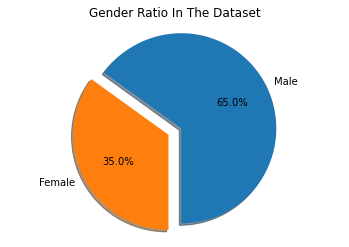

In [43]:
# plot parameters
labels = ['Male', 'Female']
slices = [195240, 104916]
explode = [0, 0.15]
# plotting in a pie chart
plt.pie(slices, labels =labels, explode = explode, shadow = True, startangle = 270, autopct='%1.1f%%')
plt.axis('equal')
plt.title("Gender Ratio In The Dataset");

In [44]:
df.head

<bound method NDFrame.head of         customerid  appointmentid  cust_age  cust_gender  build_year  \
0          1611230        6444255        52  F e m a l e        2013   
1          1421250        4988481        21  F e m a l e        2008   
2           107824         460559        42      M a l e        2019   
3           985577        6992048        35      M a l e        2013   
4          2774515        3707674        26      M a l e        2008   
...            ...            ...       ...          ...         ...   
300070     1542471        1383800        46      M a l e        2021   
300071     4565902        8669281        49  F e m a l e        2020   
300072     4202471         363169        47      M a l e        2014   
300073     1854787        4352237        33      M a l e        2017   
300074       66732        6624368        44      M a l e        2013   

        vehicle_age vehicle_type    vehicle_oem appointment_day  \
0                 9        Wagon      

In [45]:
pct_miss = df['no_show'].value_counts(normalize = True) * 100
pct_miss

False    80.540198
True     19.459802
Name: no_show, dtype: float64

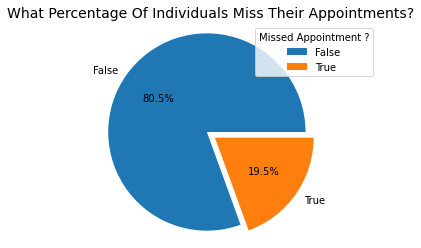

In [46]:
pct_miss.plot(kind = 'pie',autopct='%1.1f%%',explode = [0.1,0], startangle = 0)
plt.axis('equal')
plt.ylabel("")
plt.legend(title = 'Missed Appointment ?')
plt.title('What Percentage Of Individuals Miss Their Appointments?', fontdict= {'fontsize':14});

In [47]:
# percentage of each gender that showed up for their appointments
g_show = df.groupby('cust_gender')['no_show'].value_counts(normalize = True) 
g_show

cust_gender  no_show
F e m a l e  False      0.805338
             True       0.194662
M a l e      False      0.805434
             True       0.194566
Name: no_show, dtype: float64

In [12]:
g_show = g_show.reset_index(name = 'perc')
g_show

,cust_gender,no_show,perc
0,Female,False,0.949228
1,Female,True,0.050772
2,Male,False,0.950815
3,Male,True,0.049185


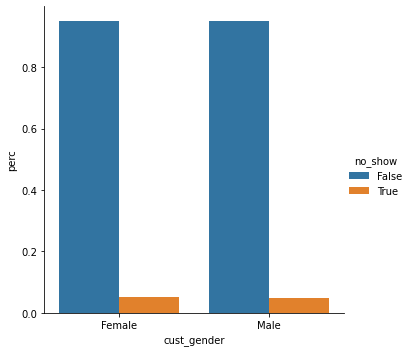

In [13]:
sns.catplot(data = g_show, x = 'cust_gender', y = 'perc', hue = 'no_show', kind = 'bar');

In [32]:
gc = df['issue_criticality'].value_counts() #gender count in the dataset
gc

High      112361
medium     97250
low        90228
Name: issue_criticality, dtype: int64

In [33]:
g_show = df.groupby('issue_criticality')['no_show'].value_counts(normalize = True) 
g_show

issue_criticality  no_show
low                False      0.719965
                   True       0.280035
medium             False      0.718252
                   True       0.281748
High               False      0.951754
                   True       0.048246
Name: no_show, dtype: float64

In [39]:
g_show = df.groupby('techinician_assigned')['no_show'].value_counts(normalize = True) 
g_show

techinician_assigned  no_show
False                 False      0.717017
                      True       0.282983
True                  False      0.720030
                      True       0.279970
Name: no_show, dtype: float64